# Face API Sample

In [1]:
import requests
from io import BytesIO
from PIL import Image, ImageDraw, ImageFont

In [2]:
subscription_key = 'subscription_key'

In [3]:
face_api_url = 'https://daegufaceapi.cognitiveservices.azure.com/face/v1.0/detect'

In [4]:
image_url = 'https://how-old.net/Images/faces2/main007.jpg'

In [5]:
omygirl_url = 'https://cdnimg.melon.co.kr/resource/image/cds/musicstory/imgUrl20201125083158781.jpg/melon/optimize/90'

In [6]:
img = Image.open(BytesIO(requests.get(omygirl_url).content))

In [8]:
headers = {'Ocp-Apim-Subscription-Key': subscription_key}

In [9]:
params = {
    'returnFaceId': 'true',
    'returnFacelandmarks': 'false', # 얼굴이정표 설정
    'returnFaceAttributes': 'age,gender,emotion'
}

In [10]:
data = { 'url': omygirl_url }

In [11]:
response = requests.post(face_api_url, params=params, headers=headers, json=data)

In [12]:
faces = response.json()

In [13]:
faces

[{'faceId': '078e8169-c09a-4a7b-a8ad-5e0cbd09c2e3',
  'faceRectangle': {'top': 116, 'left': 603, 'width': 43, 'height': 43},
  'faceAttributes': {'gender': 'female',
   'age': 21.0,
   'emotion': {'anger': 0.0,
    'contempt': 0.001,
    'disgust': 0.0,
    'fear': 0.0,
    'happiness': 0.001,
    'neutral': 0.768,
    'sadness': 0.231,
    'surprise': 0.0}}},
 {'faceId': 'a215552a-6bbf-4d9d-9515-0fae28192c00',
  'faceRectangle': {'top': 130, 'left': 91, 'width': 42, 'height': 42},
  'faceAttributes': {'gender': 'female',
   'age': 21.0,
   'emotion': {'anger': 0.0,
    'contempt': 0.152,
    'disgust': 0.0,
    'fear': 0.0,
    'happiness': 0.001,
    'neutral': 0.845,
    'sadness': 0.001,
    'surprise': 0.001}}},
 {'faceId': '415feecb-a079-499e-8a6a-1f54262c92b2',
  'faceRectangle': {'top': 146, 'left': 173, 'width': 41, 'height': 41},
  'faceAttributes': {'gender': 'female',
   'age': 21.0,
   'emotion': {'anger': 0.0,
    'contempt': 0.001,
    'disgust': 0.0,
    'fear': 0.0,
  

## 얼굴 이정표
[얼굴이정표](https://docs.microsoft.com/ko-kr/azure/cognitive-services/face/concepts/face-detection)
[얼굴 속성 정보](https://westus.dev.cognitive.microsoft.com/docs/services/563879b61984550e40cbbe8d/operations/563879b61984550f30395236)
![얼굴이정표](https://docs.microsoft.com/ko-kr/azure/cognitive-services/face/images/landmarks.1.jpg)

In [18]:
def CreateImage(faces):
    
    for face in faces:
        rect = face['faceRectangle']
        # 사각형 출력
        top = rect['top']
        left = rect['left']
        bottom = rect['height'] + top
        right = rect['width'] + left
        
        draw.rectangle(((left,top),(right,bottom)), outline='red')
        
        # 정보 작성
        fontX = left
        fontY = top - 18
        
        face_info = face['faceAttributes']
        gender = face_info['gender']
        age = face_info['age']
        
        result = 'Gender: {0} Age: {1}'.format(gender, age)
        
        draw.text((fontX, fontY), result, fill='red')
        

In [19]:
draw = ImageDraw.Draw(img)

In [20]:
CreateImage(faces)

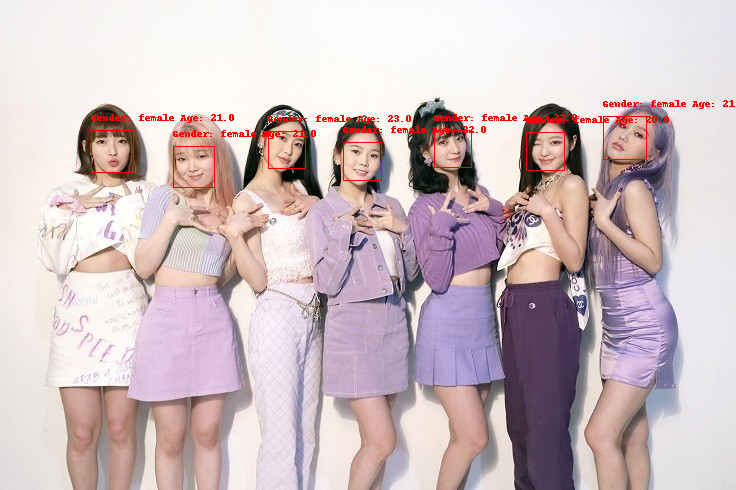

In [21]:
img